# Install QSPRpred

In [ ]:
%pip install git+https://github.com/CDDLeiden/QSPRPred.git@main
%pip install git+https://github.com/CDDLeiden/papyrus-scaffold-visualizer.git@dev
%pip install seaborn

# Create your dataset

## Fetching data from Papyrus

In [43]:
### SKIP THIS CELL ###

from qsprpred.data.sources.papyrus import Papyrus

acc_keys = ["P49840", "P36897", "Q13464", "P22455", "P21802"] # Specify the protein accession key(s) of your target(s) of interest
dataset_name = "papyrus_data"  # name of the file to be generated
quality = "low"  # choose minimum quality from {"high", "medium", "low"}
papyrus_version = '05.6'  # Papyrus database version
data_dir = "data"

papyrus = Papyrus(
    data_dir=data_dir,
    version=papyrus_version,
    stereo=False,
    plus_only=False, # Set to False to include lower quality data
)

mt = papyrus.getData(
    acc_keys,
    quality,
    name=dataset_name,
    use_existing=True,
    activity_types=["Ki", "IC50", "Kd", "EC50"]
)
mt

Number of files to be downloaded: 10
Total size: 8.18GB


Reading data from data...
Read all data.
Initialized filters.


0it [00:00, ?it/s]

Number of compounds:8364
Wrote data to file 'data\papyrus_data.tsv'.


In [1]:
# read in all data
import pandas as pd
df = pd.read_csv('data/papyrus_data.tsv', sep='\t')

# filter data for target of interest
MY_TARGET = 'P49840' # REPLACE WITH YOUR TARGET ACCESSION

df = df[df['accession'] == MY_TARGET]

# keep only high quality data
df = df[df['Quality'] == 'High']

# Create molecule table for visualization
from qsprpred.data.data import MoleculeTable

mt = MoleculeTable(df=df, name=MY_TARGET)

mt.getDF()

c:\Users\helle\anaconda3\envs\ulla2023\Lib\site-packages\qsprpred\data\data.py:552: UserWarning: Existing data set found, but also found a data frame in store. Refusing to overwrite data. If you want to overwrite data in store, set overwrite=True.
  super().__init__(name, df, store_dir, overwrite, index_cols, n_jobs, chunk_size)


,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,QSPRID,Split_IsTrain
QSPRID,,,,,,,,,,,,,,,,,,,,,
P49840_0,AAMDUWSPNAKRLV_on_P49840_WT,High,Christmann2016,Christmann2016.compound.814,NC(=O)c1ccc2nc(-c3ccc([N+]([O])=O)o3)cn2c1,AAMDUWSPNAKRLV,AAMDUWSPNAKRLV-UHFFFAOYSA-N,InChI=1S/C12H8N4O4/c13-12(17)7-1-3-10-14-8(6-1...,"""AuxInfo=1/1/N:20,10,19,11,5,7,4,8,9,18,12,2,1...",P49840_WT,...,=,6.000,6.00,0.0,0.0,1.0,6.00,0.0,P49840_0,True
P49840_1,ACWKGTGIJRCOOM_on_P49840_WT,High,ChEMBL31,ChEMBL31.compound.398297,COc1cc(F)ccc1-c1ncnc(Nc2cccc(CS(C)(=N)=O)c2)n1,ACWKGTGIJRCOOM,ACWKGTGIJRCOOM-UHFFFAOYSA-N,InChI=1S/C18H18FN5O2S/c1-26-16-9-13(19)6-7-15(...,"""AuxInfo=1/1/N:1,23,18,19,17,7,8,26,4,21,12,20...",P49840_WT,...,=,7.350,7.35,0.0,0.0,1.0,7.35,0.0,P49840_1,False
P49840_2,ADDQXEDWJOPRKR_on_P49840_WT,High,Christmann2016,Christmann2016.compound.1070,CN(C)c1ccc(NC(=O)CC2Nc3ccccc3NC2=O)cc1,ADDQXEDWJOPRKR,ADDQXEDWJOPRKR-UHFFFAOYSA-N,InChI=1S/C18H20N4O2/c1-22(2)13-9-7-12(8-10-13)...,"""AuxInfo=1/1/N:1,3,18,17,19,16,6,23,5,24,11,7,...",P49840_WT,...,=,5.400,5.40,0.0,0.0,1.0,5.40,0.0,P49840_2,False
P49840_3,AFZIRKJTSPMVSW_on_P49840_WT,High,ChEMBL31,ChEMBL31.compound.420064,O=C(Nc1cc(-c2nc(Cc3ccccc3)[nH]c2-c2ccc(F)cc2)c...,AFZIRKJTSPMVSW,AFZIRKJTSPMVSW-UHFFFAOYSA-N,InChI=1S/C25H21FN4O/c26-20-10-8-17(9-11-20)23-...,"""AuxInfo=1/1/N:22,21,23,20,24,30,31,10,15,11,1...",P49840_WT,...,=,6.370,6.37,0.0,0.0,1.0,6.37,0.0,P49840_3,True
P49840_4,AMQWJXRKJIUZAW_on_P49840_WT,High,ChEMBL31,ChEMBL31.compound.405770,Cc1ccc(-c2ccc(C=C3SC(N)=NC3=O)o2)c([N+](=O)[O-...,AMQWJXRKJIUZAW,AMQWJXRKJIUZAW-UHFFFAOYSA-N,InChI=1S/C15H11N3O4S/c1-8-2-4-10(11(6-8)18(20)...,"""AuxInfo=1/1/N:1,3,8,4,7,23,10,2,9,5,19,6,11,1...",P49840_WT,...,=,6.790,6.79,0.0,0.0,1.0,6.79,0.0,P49840_4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P49840_1105,ZYDQWWRARYHYHC_on_P49840_WT,High,ChEMBL31,ChEMBL31.compound.214071,COc1ccc(-c2ccc(CSc3nnc(-c4ccc5c(c4)OCCO5)o3)cc...,ZYDQWWRARYHYHC,ZYDQWWRARYHYHC-UHFFFAOYSA-N,InChI=1S/C24H20N2O4S/c1-27-20-9-6-18(7-10-20)1...,"""AuxInfo=1/0/N:1,9,28,8,29,5,30,18,4,31,19,22,...",P49840_WT,...,=,7.72,7.72,0.0,0.0,1.0,7.72,0.0,P49840_1105,True
P49840_1106,ZYTFPHRVOZXPGZ_on_P49840_WT,High,Christmann2016,Christmann2016.compound.223,Cc1[nH]nc2ccc(-c3cncc(OCCN)c3)cc12,ZYTFPHRVOZXPGZ,ZYTFPHRVOZXPGZ-UHFFFAOYSA-N,InChI=1S/C15H16N4O/c1-10-14-7-11(2-3-15(14)19-...,"""AuxInfo=1/1/N:1,16,17,11,10,7,4,15,13,2,5,6,8...",P49840_WT,...,=,5.2,5.20,0.0,0.0,1.0,5.20,0.0,P49840_1106,False
P49840_1107,ZZIXCHIEESZZDI_on_P49840_WT,High,Christmann2016,Christmann2016.compound.571,O=C(Nc1cccc(C2Nc3ccc4ccccc4c3C3C=CCC32)c1)c1cc...,ZZIXCHIEESZZDI,ZZIXCHIEESZZDI-UHFFFAOYSA-N,InChI=1S/C29H23FN2O/c30-21-14-11-19(12-15-21)2...,"""AuxInfo=1/1/N:14,15,25,21,13,24,26,16,20,22,2...",P49840_WT,...,=,5.7,5.70,0.0,0.0,1.0,5.70,0.0,P49840_1107,False


## Preparing data for modelling

In [2]:
from qsprpred.models.tasks import TargetTasks
from qsprpred.data.data import QSPRDataset

target_props=[{
                "name": "pchembl_value_Median", # name of the target column in the dataset
                "task": TargetTasks.REGRESSION, # specify the task type (SINGLECLASS, MULTICLASS, REGRESSION)
                }]

# Create a QSPRDataset instance used for training and evaluation of QSPR models
dataset = QSPRDataset.fromMolTable(mt, target_props=target_props)
dataset.targetProperties

c:\Users\helle\anaconda3\envs\ulla2023\Lib\site-packages\qsprpred\data\data.py:552: UserWarning: Existing data set found, but also found a data frame in store. Refusing to overwrite data. If you want to overwrite data in store, set overwrite=True.
  super().__init__(name, df, store_dir, overwrite, index_cols, n_jobs, chunk_size)


[TargetProperty(name=pchembl_value_Median, task=REGRESSION)]

![descriptors](figures/descriptors_small.png)

In [3]:
from qsprpred.data.utils.descriptorsets import FingerprintSet
from qsprpred.data.utils.descriptorcalculator import MoleculeDescriptorsCalculator
from sklearn.preprocessing import StandardScaler as Scaler
from qsprpred.data.utils.datasplitters import RandomSplit

# Calculate MorganFP and physicochemical properties
feature_calculator = MoleculeDescriptorsCalculator(desc_sets = [FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048)])

# Do a random split for creating the train (80%) and test set (20%)
rand_split = RandomSplit(0.2)

# calculate compound features and split dataset into train and test
dataset.prepareDataset(
    split=rand_split,
    feature_calculators=[feature_calculator],
    feature_standardizer=Scaler()
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of samples test set: {len(dataset.y_ind)}")

# Let's save the dataset for later
dataset.save()

Molecular descriptors already exist in P49840. Use `recalculate=True` to overwrite them.
Missing values filled with nan


Number of samples train set: 888
Number of samples test set: 222


# Data Visualization

<Axes: xlabel='pchembl_value_Median', ylabel='Count'>

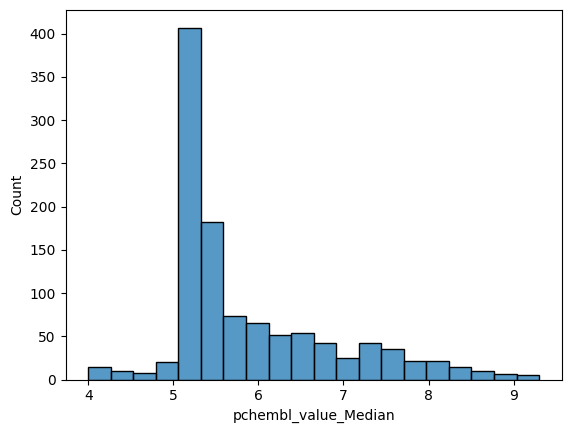

In [4]:
# create histogram of pchembl values in the dataset
import seaborn as sns
sns.histplot(dataset.getDF()['pchembl_value_Median'], bins=20)

In [5]:
from scaffviz.clustering.manifold import TSNE
from qsprpred.data.utils.scaffolds import Murcko, BemisMurcko
from scaffviz.depiction.plot import Plot

dataset.addScaffolds([Murcko()])

plt = Plot(TSNE())
plt.plot(dataset,
         recalculate=False,
         mols_per_scaffold_group=5,
         port=9292, # if you want to re-run this cell, you need to change this port number
         interactive=True)
         
plt.plot(dataset,
         recalculate=False,
         mols_per_scaffold_group=5,
         port=9293, # if you want to re-run this cell, you need to change this port number
         interactive=True,
         color_by='pchembl_value_Median')

Done!


# Training a ML model

In [6]:
N_CPU = 4 # number of CPUs for parallel operations

In [7]:
from qsprpred.models.models import QSPRsklearn
from sklearn.cross_decomposition import PLSRegression
from qsprpred.models.hyperparam_optimization import OptunaOptimization

# This is an SKlearn model, so we will initialize it with the QSPRsklearn class
model = QSPRsklearn(base_dir = '.', data=dataset, alg = PLSRegression, name='PLS_REG')

# We will first optimize the hyperparameters (n_components and scale) through bayes optimization
# the best hyperparameter combination will be saved in PLS_REG_params.json
search_space_bs = {"n_components": ["int", 1, 30], "scale": ["categorical", [True, False]]}
bayesoptimizer = OptunaOptimization(scoring = model.scoreFunc, param_grid=search_space_bs, n_trials=5)
best_params = bayesoptimizer.optimize(model)

#Then we will evaluate the performance of the best model using the independent test set
_ = model.evaluate()

# Finally, we need to fit the model on the complete dataset if we want to use it further
# model is saved under qspr/models/PLS_REG.json
model.fit()

[I 2023-06-27 16:06:44,171] A new study created in memory with name: no-name-2a97fcf8-466e-4789-9474-41dac7a5a5b3
[I 2023-06-27 16:06:45,222] Trial 0 finished with value: 0.28286031243205123 and parameters: {'n_components': 15, 'scale': True}. Best is trial 0 with value: 0.28286031243205123.
[I 2023-06-27 16:06:46,533] Trial 1 finished with value: 0.25740196706465335 and parameters: {'n_components': 21, 'scale': False}. Best is trial 0 with value: 0.28286031243205123.
[I 2023-06-27 16:06:47,210] Trial 2 finished with value: 0.3528298759252535 and parameters: {'n_components': 7, 'scale': True}. Best is trial 2 with value: 0.3528298759252535.
[I 2023-06-27 16:06:47,878] Trial 3 finished with value: 0.4005077908159176 and parameters: {'n_components': 5, 'scale': False}. Best is trial 3 with value: 0.4005077908159176.
[I 2023-06-27 16:06:48,483] Trial 4 finished with value: 0.4005077878776341 and parameters: {'n_components': 5, 'scale': True}. Best is trial 3 with value: 0.4005077908159176

'./qspr/models/PLS_REG/PLS_REG_meta.json'

  ModelName        R2      RMSE  Set
0   PLS_REG  0.461997  0.741112   cv
1   PLS_REG  0.400039  0.771268  ind


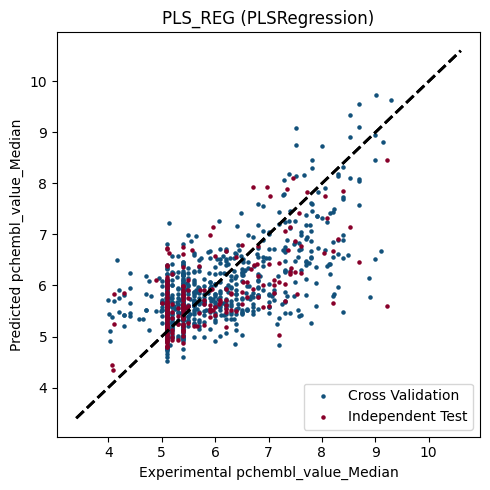

In [8]:
from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False, property_name='pchembl_value_Median')
axes[0]

print(summary)

In [9]:
from scaffviz.depiction.plot import ModelPerformancePlot
from scaffviz.clustering.manifold import TSNE

plot = ModelPerformancePlot(
    TSNE(), # use t-SNE for dimensionality reduction, does not recalculate if already done before on a data set
    [model], # list of models to show the plot for
    plot_type="errors", # type of the plot
    ports=[9200] # ports on localhost to use for each model performance plot (one for each model, must be unique)
)

plot.make()

{9200: {'model': <qsprpred.models.models.QSPRsklearn at 0x1c8970a6010>,
  'server': <function scaffviz.depiction.plot.ModelPerformancePlot.make.<locals>.plot_server.<locals>.run()>,
  'plot_type': 'errors',
  'table': <qsprpred.data.data.MoleculeTable at 0x1c8c2e47ed0>,
  'plot': <scaffviz.depiction.plot.Plot at 0x1c8c2e1f710>,
  'thread': <Thread(Thread-41 (run), stopped 11164)>}}

# Make predictions for your own compounds

Missing values filled with nan


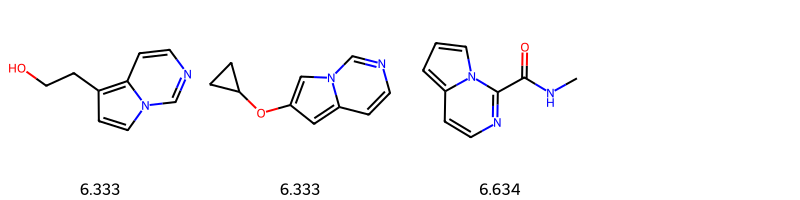

In [20]:
# replace with your own compounds
list_of_smiles = ['OCCc1ccn2cnccc12',
                  'C1CC1Oc1cc2ccncn2c1',
                  'CNC(=O)c1nccc2cccn12']

# make predictions with the model
predictions = model.predictMols(list_of_smiles)

# show molecules with predicted values using rdkit
from rdkit import Chem
from rdkit.Chem import Draw
 
mols = [Chem.MolFromSmiles(smi) for smi in list_of_smiles]
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=[f'{pred[0]:.3f}' for pred in predictions])